In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from matplotlib.pyplot import figure
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import math
pd.set_option('display.float_format', '{:.2f}'.format)
import zipfile

# Data = pd.read_csv('cleaned_data.csv')
Data = pd.read_csv('cleaned_data.csv.zip')
# Data = pd.read_csv('cleaned_data.csv', compression='gzip')


In [18]:
#creaing a function to seperate the unique names from all the rows into a list
def seperate(all_list):
    listing = []
    for l in all_list:
        if isinstance(l,str):
            a=l.split(";")
            for j in a:
                if j not in listing and isinstance(j,str):
                    listing.append(j)
    return listing

In [19]:
#creating a dictionery of programming languages that people know with their counts 
Alllanguages = Data["LanguageHaveWorkedWith"].tolist()

languages= seperate(Alllanguages)
LangDict = {}
for i in languages:
    LangDict[i] = Data["LanguageHaveWorkedWith"].str.contains(i, na=False).sum()

#creating a dictionery of programming languagesthat people want to learn or work with and the number of instances
Alllanguages_want = Data["LanguageWantToWorkWith"].tolist()

languages_want = seperate(Alllanguages_want)
LangDict_want = {}
for i in languages_want:
    LangDict_want[i] = Data["LanguageWantToWorkWith"].str.contains(i, na=False).sum()

C:\Users\samue\AppData\Local\Temp\ipykernel_11352\187028283.py:7: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.

C:\Users\samue\AppData\Local\Temp\ipykernel_11352\187028283.py:15: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



***Programming Languaes worked with compared to the prograaming languages want to work with***

<Axes: xlabel='y', ylabel='x'>

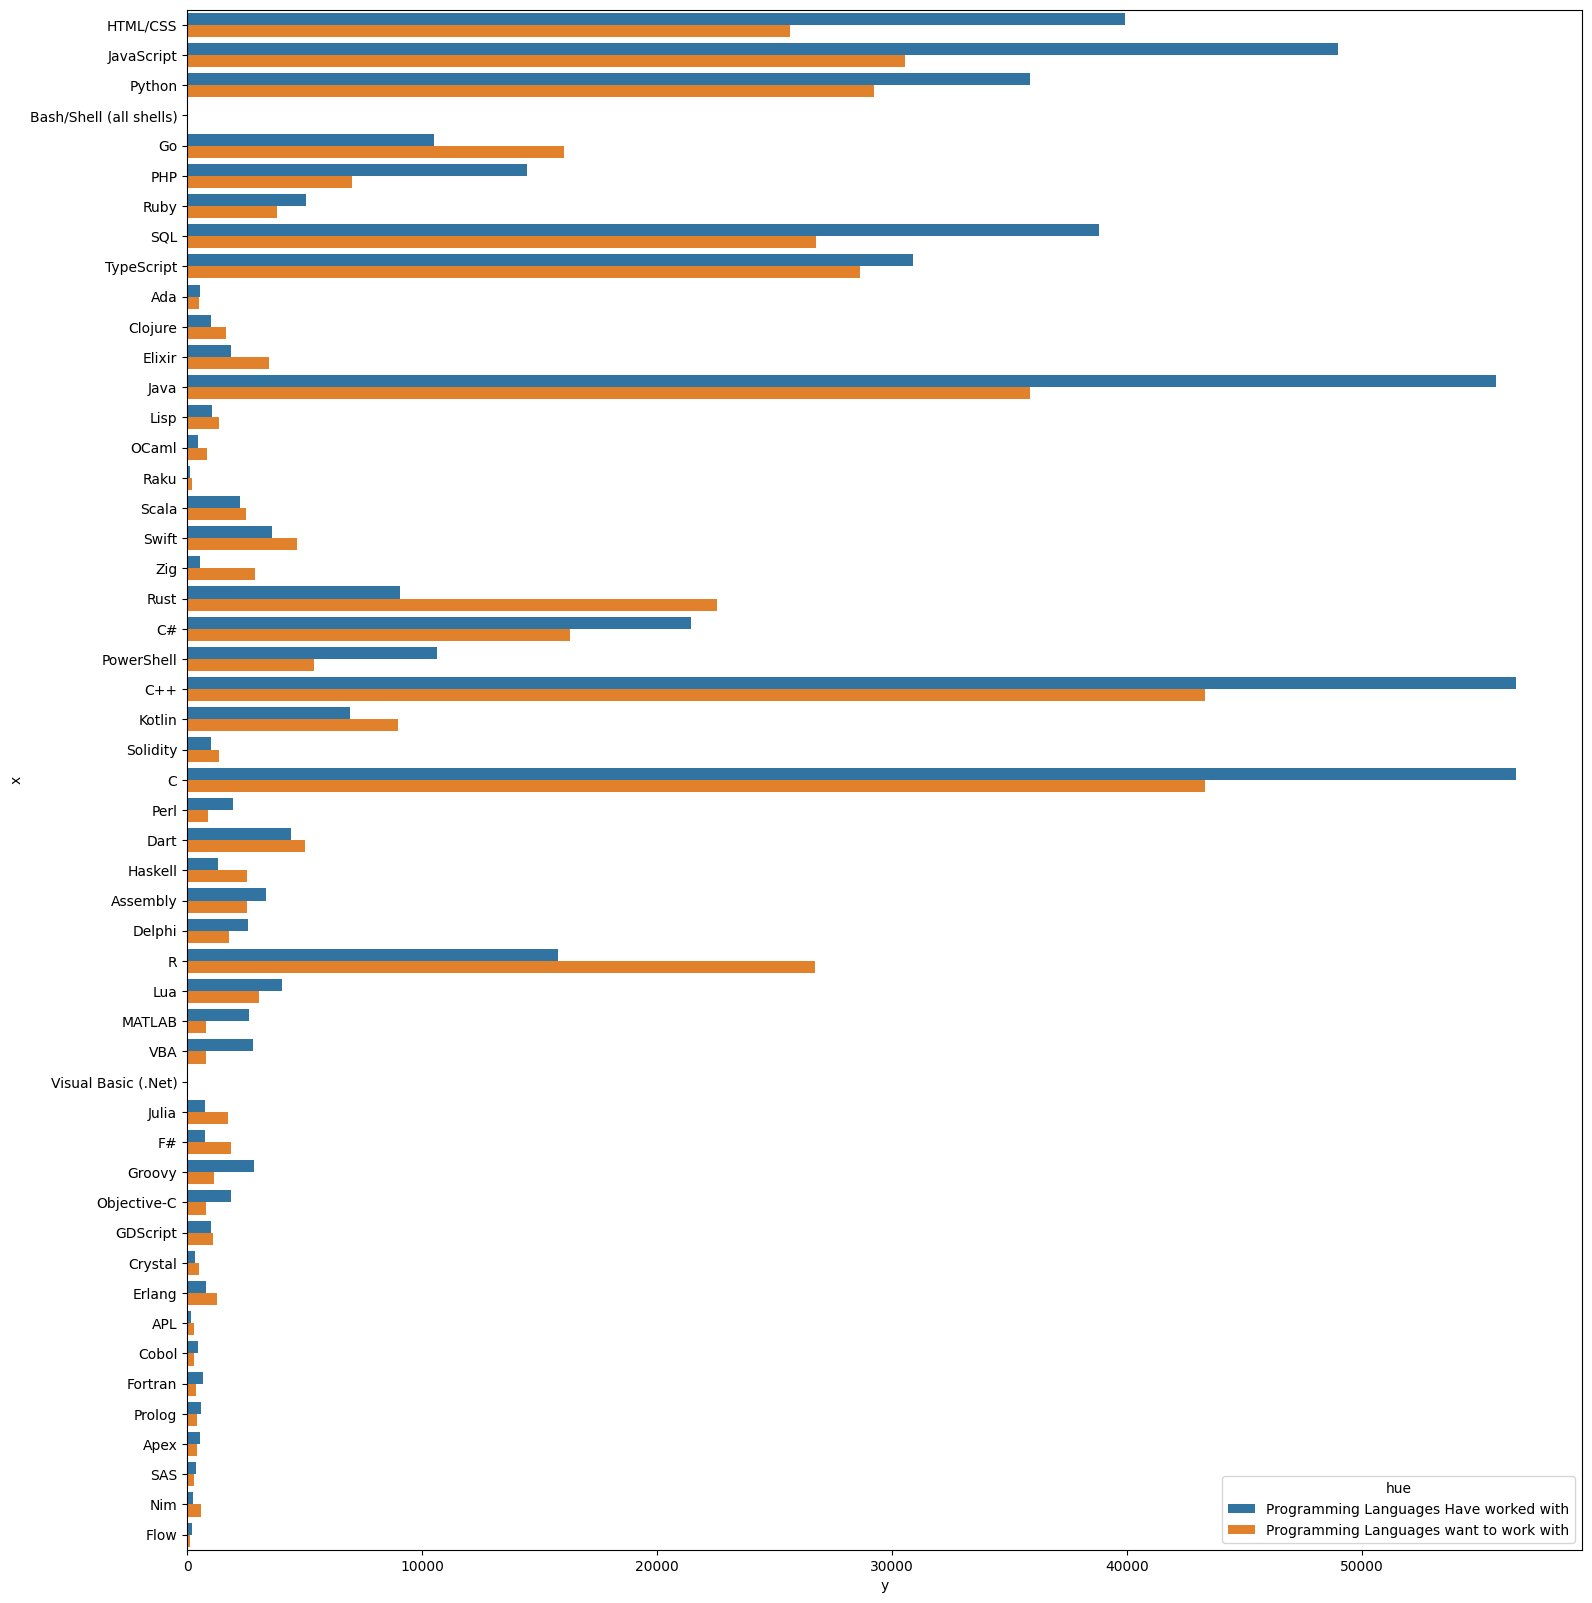

In [20]:
plt.rcParams["figure.figsize"] = (18,20)
df1=pd.DataFrame({'x':list(LangDict.keys()), 'y': list(LangDict.values())})
df2=pd.DataFrame({'x':list(LangDict_want.keys()), 'y': list(LangDict_want.values())})
df1['hue']="Programming Languages Have worked with"
df2['hue']= "Programming Languages want to work with"
res=pd.concat([df1,df2])

sns.barplot(res, x="y", y="x", orient="y", hue="hue")

In [21]:
All_Webframe = Data["WebframeHaveWorkedWith"].tolist()

webframe= seperate(All_Webframe)
WebDict = {}
for i in webframe:
    WebDict[i] = Data["WebframeHaveWorkedWith"].str.contains(i, na=False).sum()

All_Webframe_want = Data["WebframeWantToWorkWith"].tolist()

webframe_want= seperate(All_Webframe_want)
WebDict_want = {}
for i in webframe_want:
    WebDict_want[i] = Data["WebframeWantToWorkWith"].str.contains(i, na=False).sum()

***WebFrames worked with compared to the WebFrames want to work with***

<Axes: xlabel='y', ylabel='x'>

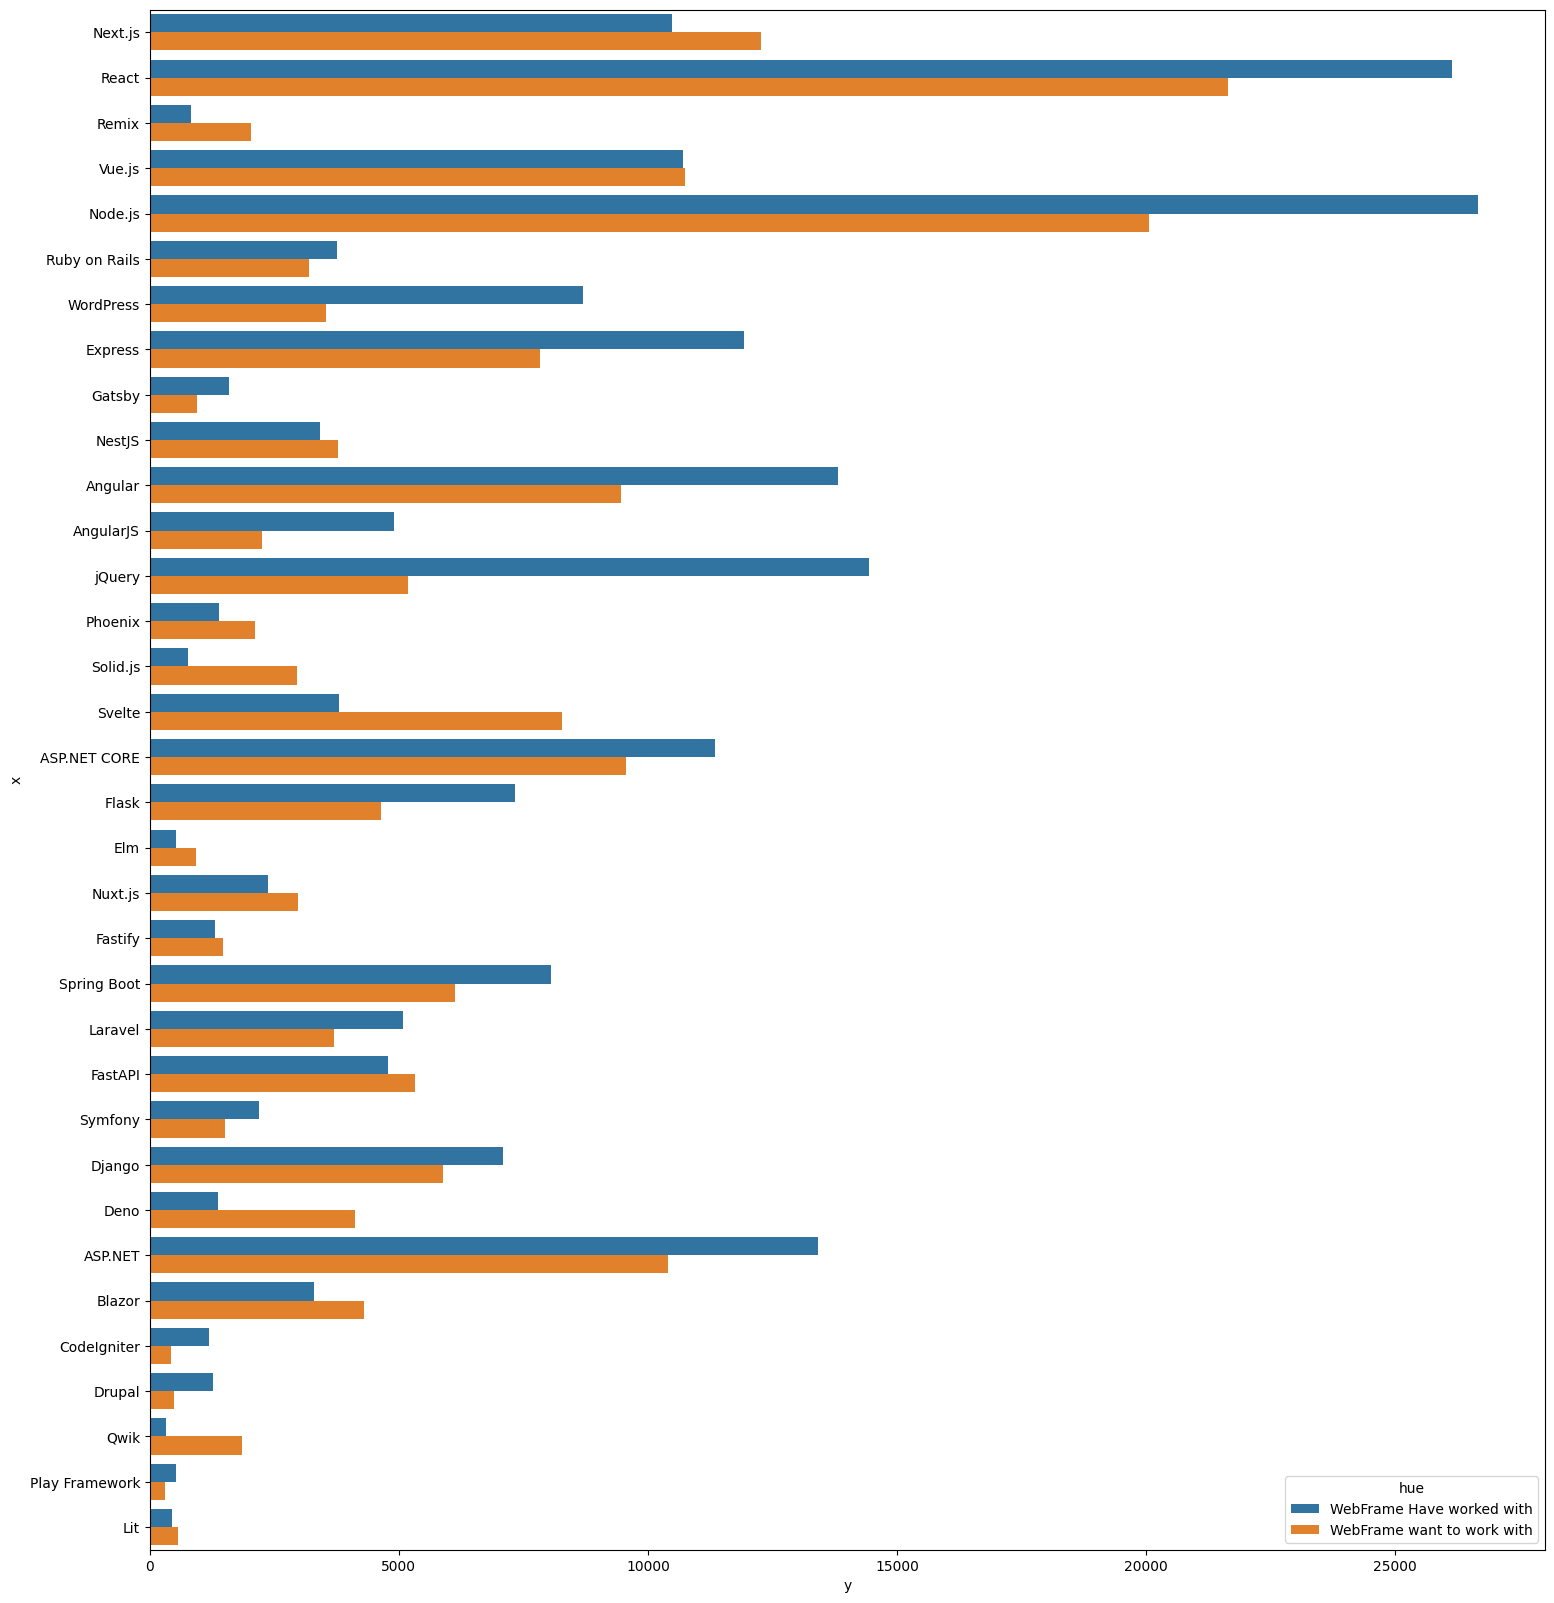

In [22]:
df3=pd.DataFrame({'x':list(WebDict.keys()), 'y': list(WebDict.values())})
df4=pd.DataFrame({'x':list(WebDict_want.keys()), 'y': list(WebDict_want.values())})
df3['hue']="WebFrame Have worked with"
df4['hue']= "WebFrame want to work with"
res=pd.concat([df3,df4])

sns.barplot(res, x="y", y="x", orient="y", hue="hue")

In [23]:
new = Data.groupby(['Country'])['Country'].count()
new= pd.DataFrame(new)
new = new.rename(columns={'Country': 'Count'})
new=new.reset_index()
new[new['Count']== new['Count'].max()]

,Country,Count
176,United States of America,16735


***USA top ten Developer types and their salaries with only 1 year of experience***

In [24]:
salary = Data[(Data["Country"]=="United States of America")  & (Data["WorkExp"]<=1)][["DevType","CompTotal"]].sort_values(by=['CompTotal'],ascending=False)
salary.head(10)

,DevType,CompTotal
60995,"Developer, back-end",400000.00
31891,Data scientist or machine learning specialist,300000.00
62688,Hardware Engineer,250000.00
66856,Security professional,250000.00
32661,Other (please specify):,238000.00
8984,Developer Experience,230000.00
25450,Security professional,225000.00
75189,"Developer, desktop or enterprise applications",220000.00
3365,"Developer, back-end",220000.00
66073,"Developer, full-stack",206000.00


***USA top ten Developer types and their average salaries with only 1 year of experience***

In [25]:
salary_grouped = salary.groupby(["DevType"])
salary = salary_grouped['CompTotal'].mean()
salary_Data = pd.DataFrame(salary).reset_index()
salary_Data.sort_values(by=['CompTotal'],ascending=False).head(10)

,DevType,CompTotal
7,Developer Experience,230000.00
26,Security professional,188666.67
14,"Developer, game or graphics",155000.00
20,Hardware Engineer,137800.00
2,Cloud infrastructure engineer,137645.00
4,Data scientist or machine learning specialist,134250.00
9,"Developer, back-end",116746.15
24,Research & Development role,114666.67
17,"Engineer, data",113333.33
22,Other (please specify):,109048.18


**AI Review**

In [26]:
AI = Data.groupby(['AISent'])['AISent'].count()
AI = pd.DataFrame(AI)
AI = AI.rename(columns={'AISent': 'Count'}).reset_index()
AI

,AISent,Count
0,Favorable,25966
1,Indifferent,8936
2,Unfavorable,1506
3,Unsure,2112
4,Very favorable,15001
5,Very unfavorable,231


***What do masses think. Is AI favorable or Not?***

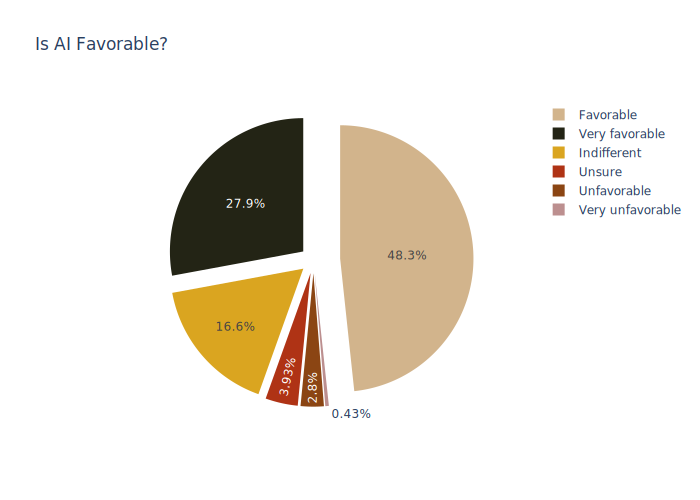

In [64]:
earth_colors = [
    "rgb(210,180,140)",
    "rgb(218,165,32)",
    "rgb(139,69,19)",
    "rgb(175, 51, 21)",
    "rgb(35, 36, 21)",
    "rgb(188,143,143)",
]

fig = go.Figure(
    data=[
        go.Pie(
            labels=AI['AISent'].to_list(),
            values=AI['Count'].to_list(),
            
            pull=[0.2, 0.1, 0.1, 0.1, 0.1, 0.1],
            
            marker_colors=earth_colors,
        )
    ]
)

fig.update_layout(title_text="Is AI Favorable?")

fig.show(renderer="svg")


***Is AI being used in the development process?***

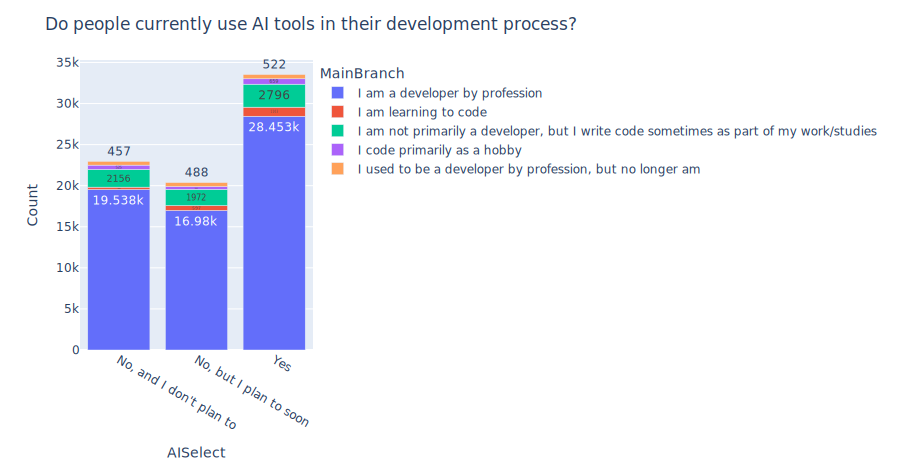

In [63]:

branch = Data.groupby(['MainBranch', 'AISelect'])['AISelect'].count()
branch = pd.DataFrame(branch)
branch = branch.rename(columns={'AISelect': 'Count'}).reset_index()

fig = px.bar(branch, x="AISelect", y="Count", color="MainBranch", text_auto=True, width=900, height=470)
fig.update_layout(title_text=" Do people currently use AI tools in their development process? ")
fig.show(renderer="svg")
